C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dynamiqs\qarrays\qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 134.69ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:08<00:00,  5.87it/s]


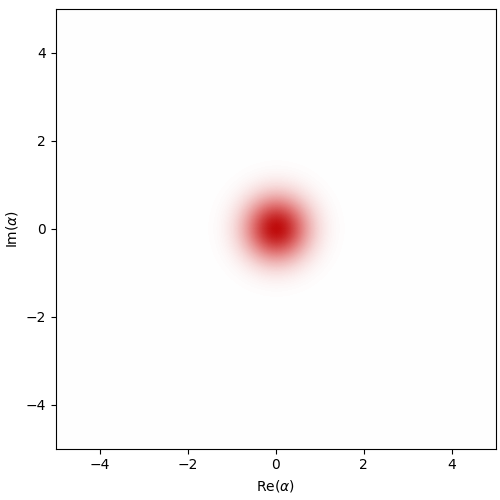

In [1]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import numpy as np

jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

g2 = 1 #chlling
eps = -4
Kb = 10

na = 20 # Hilbert space dimension
a = dq.destroy(na) # annihilaiton operator
psi0 = dq.fock(na, 0) # initial state
H = dq.zeros(na) # zero Hamiltonian

kappa_2 = 4*g2**2/Kb # two-photon loss rate
alpha = np.sqrt(-eps/g2) # cat size
tsave = np.linspace(0, 4, 100)
loss_op = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(res.states)


In [17]:
# 1-1 code for comparison

na = 20
nb = 5
a, b = dq.destroy(na, nb)

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian
# initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state

jump_ops = [jnp.sqrt(Kb)*b]
res_2_mode = dq.mesolve(H,jump_ops, psi0, tsave)


|          |   0.2% ◆ elapsed 3.68ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 263.48ms ◆ remaining 0.00ms  


(100,)


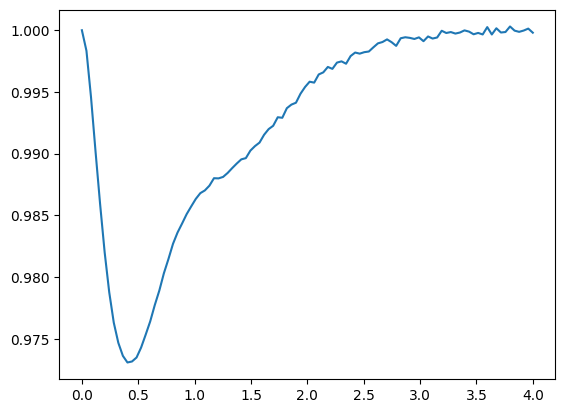

In [18]:
trace_a_2mode = dq.ptrace(res_2_mode.states, 0,res_2_mode.states.dims) # trace of a
trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a
fidelity_plot = dq.fidelity(trace_a, trace_a_2mode)
print(fidelity_plot.shape)
plt.plot(tsave, fidelity_plot)